<a href="https://colab.research.google.com/github/ArjunRameshV/Neural_Networks/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import fashion_mnist

In [41]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Understand the data

In [5]:
x_train.shape #color channel needs to be added

(60000, 28, 28)

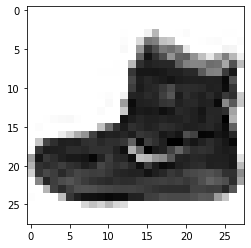

In [7]:
plt.imshow(x_train[0],cmap='gray_r')

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
no_of_labels = len(list(set(y_train)))
no_of_labels

10

Normalize the input and reshape to add color channel


In [42]:
x_train = x_train/255
x_test = x_test/255

In [28]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [43]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

One-Hot Encode the labels 

In [32]:
from keras.utils.np_utils import to_categorical

In [44]:
y_cat_train = to_categorical(y_train,no_of_labels)
y_cat_test = to_categorical(y_test,no_of_labels)

Making the model

In [37]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Activation

In [35]:
from keras.models import Sequential

In [38]:
model = Sequential()

# adding the convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

#flattening the current set of layers
model.add(Flatten())

model.add(Dense(units=128))
model.add(Activation('relu'))

model.add(Dense(units=no_of_labels))
model.add(Activation('softmax'))

In [39]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)               

In [47]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.2866 - accuracy: 0.9004
Epoch 2/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.2585 - accuracy: 0.9095
Epoch 3/10
60000/60000 [==============================] - 28s 469us/step - loss: 0.2414 - accuracy: 0.9154
Epoch 4/10
60000/60000 [==============================] - 28s 469us/step - loss: 0.2271 - accuracy: 0.9209
Epoch 5/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.2149 - accuracy: 0.9244
Epoch 6/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.2051 - accuracy: 0.9282
Epoch 7/10
60000/60000 [==============================] - 28s 466us/step - loss: 0.1962 - accuracy: 0.9316
Epoch 8/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.1870 - accuracy: 0.9350
Epoch 9/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.1792 - accuracy: 0.9377
Epoch 10/10
60000/60000 [============

In [48]:
model.metrics_names

['loss', 'accuracy']

In [49]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 156us/step


[0.3136398658871651, 0.902899980545044]

In [50]:
from sklearn.metrics import classification_report

In [53]:
predictions = model.predict_classes(x_test)

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.84      0.85      1000
           3       0.92      0.91      0.91      1000
           4       0.83      0.86      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.69      0.78      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [61]:
img = x_test[10]
img.shape

(28, 28, 1)

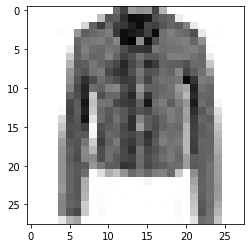

In [62]:
plt.imshow(img.reshape(28,28),cmap='gray_r')

In [63]:
print(predictions[10],y_test[10])

4 4
